# **SVM - Kernel comparison**

## Kernel interpretation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles

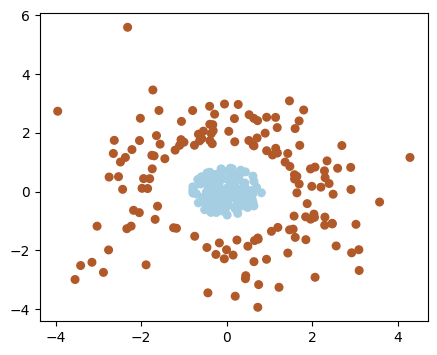

In [2]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)
X [y == 0] = X[y == 0] *0.5


_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap='Paired')

In [3]:
#funcion Exponencial para clasificador kernel
Xk = X[:,0]**2 + X[:,1]**2
print(Xk.shape)

# #funcion lineal no es adecuada para hacer la separacion de este clasificador
# Xk = X[:,0] + X[:,1]
# print(Xk.shape)

(300,)


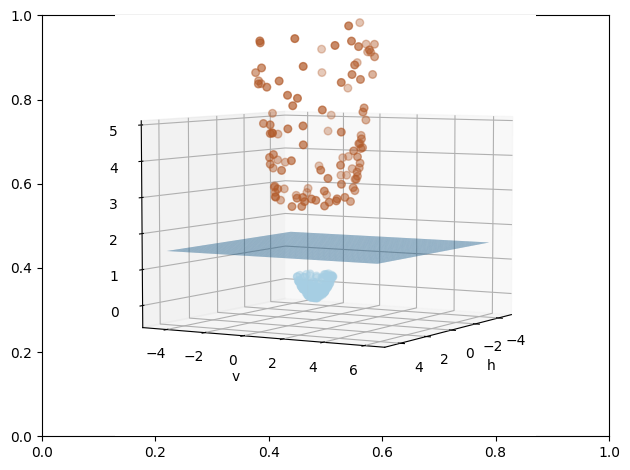

In [4]:
f, _ = plt.subplots()
ax = f.add_subplot(projection='3d')
ax.view_init(5,30) # son grados, el primer parametro rota el eje x (ver desde arriba), el segundo el eje y (como dar una vuelta de pie)
ax.scatter3D( X[:,0] , X[:,1] , Xk , c = y , s=30, cmap='Paired')
ax.set_zlim(-0.5,5)

h_grid, v_grid = np.meshgrid(np.linspace(-4.5,4.5,100), np.linspace(-4.5,6.2,100))
z_grid = np.ones(h_grid.shape) * 1.5 #El 1.5 es donde se ubica en z ese arrego de 1 "el hiperplano"


ax.plot_surface(h_grid,v_grid, z_grid, alpha = 0.5) #graficando la superficie
ax.set_xlabel('h'), ax.set_ylabel('v')
ax.set_zlim(-0.5,5)
plt.tight_layout()

In [5]:
# Sve all figs
import os
os.makedirs('imgs/', exist_ok = True) #Creando una carpeta para guardar las imagenes
#el parametro es para que no salga error por si la carpeta ya existe

for angle in range(0,91,2):
  f, _ = plt.subplots()
  ax = f.add_subplot(projection = '3d')
  ax.view_init(angle, 30)
  ax.scatter3D(X[:,0], X[:,1], Xk, c= y, s= 30, cmap='Paired')
  ax.plot_surface(h_grid,v_grid, z_grid, alpha = 0.5)
  ax.set_xlabel('h'), ax.set_ylabel('v'), ax.set_zlabel('k')
  ax.set_zlim(0,5) #límites del eje z
  plt.savefig('imgs/{0}.png'.format(angle), dpi=200) #para guardar los plots como imagen
  plt.clf(), plt.close() #Elimina el eje para que no se sobrescriba y la otra lo cierra

In [6]:
import os
from PIL import Image
from natsort import natsorted, ns

images = []
files_ = natsorted(os.listdir('/content/imgs'), alg = ns.PATH) #creando la lista de archivos "os.listdir('/content/imgs')"" me devuelve la lista de los archivos en ese directorio, (alg = ns.PATH) el algoritmo de ordenamiento es
print(len(files_))
# Save a gif
for img in files_:
  image = Image.open('imgs/{0}'.format(img)) #abriendo la imagen
  images.append(image)

image.save("kernel_.gif", save_all=True, append_images=images, duration=200, loop=0)

46


## SVM

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification #ace datos isotropicos
import sys
#sys.path.append('') #ruta
# from Tools.utils import plot_decision_boundary

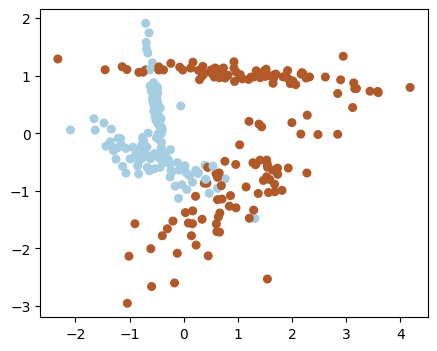

In [8]:
# we create 100 separable points
# X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
# plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

# X, y = make_classification(n_samples = 300 , n_features = 2 , n_redundant=0,  n_informative=2, n_clusters_per_class=2, random_state = 2)
# X [y == 0] = X[y == 0] *0.5
# _, ax = plt.subplots(figsize=(5,4))
# ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap='Paired')

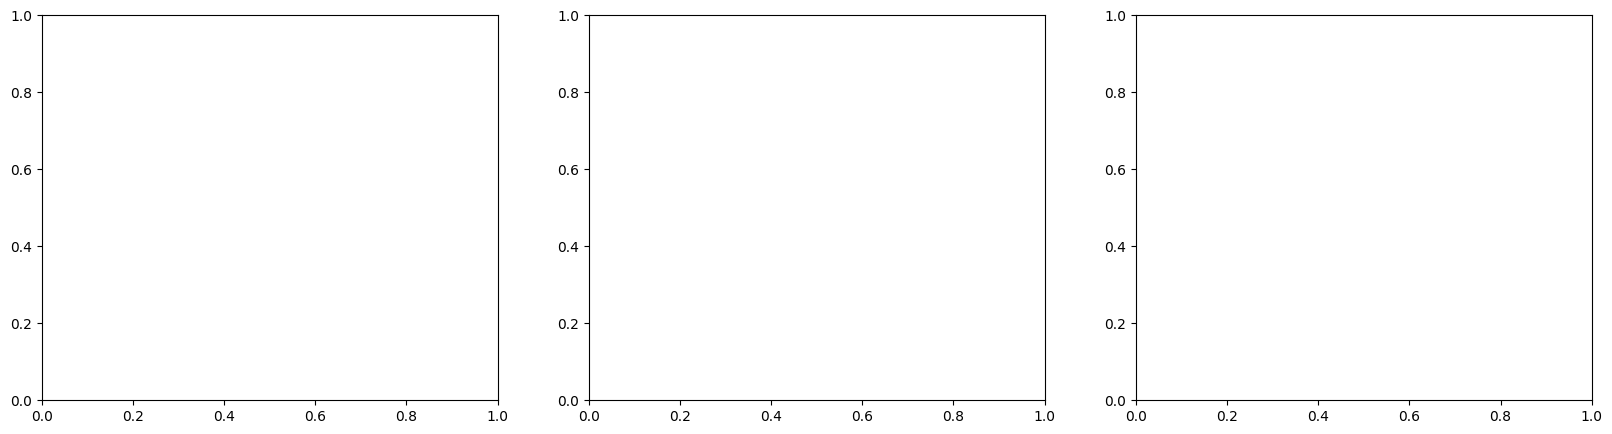

AttributeError: module 'numpy' has no attribute 'arrage'

In [11]:

# kernels = ['linear', 'poly', 'rbf']

# _, axes = plt.subplots(1,3, figsize = (20,5))

# # fit the model
# for i,kernel in enumerate(kernels):
#   clf = SVC(kernel = kernel , gamma = 1, degree=2)
#   clf.fit( X , y )

#   def Boundaries(NamePred,horizontal, vertical,NValue, Nlabel, width, long):
#     h_min,h_max = horizontal[:,0].min()-0.1, horizontal[:,0].max()+0.1
#     v_min,v_max = vertical[:,1].min()-0.1, vertical[:,1].max()+0.1

#     h_grid, v_grid = np.meshgrid(np.arrage(h_min,h_max,NValue), np.arrage(v_min,v_max,NValue))
#     pred_grid = NamePred.predict(np.c_[h_grid.ravel(),v_grid.ravel()])

#     axes[i].pcolormesh( h_grid , v_grid , pred_grid, cmap ='Paired')
#     axes[i].contour(h_grid , v_grid , pred_grid, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

#     axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

#     axes[i].scatter( horizontal[:,0],vertical[:,1], c=Nlabel, cmap='Paired', edgecolors='k')
#     axes[i].set_axis_off()
#     # x_min, x_max = _ , _
#     # y_min, y_max = _ , _

#     # x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
#     # predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

#     # predictions = predictions.reshape( _ )
#     # axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
#     # axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

#     # axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

#     # axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
#     # axes[i].set_axis_off()

# plt.show()
# Boundaries(clf,X,X,0.01,y,5,4)


In [ ]:

# kernels = ['linear', 'poly', 'rbf']

# _, axes = plt.subplots(1,3, figsize = (20,5))

# # fit the model
# for i, kernel in enumerate(kernels):
#     #
#     clf = svm.SVC(kernel = _ , gamma = 1)
#     clf.fit( _ , _ )

#     x_min, x_max = _ , _
#     y_min, y_max = _ , _

#     x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
#     predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

#     predictions = predictions.reshape(x_dim.shape)
#     axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
#     axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

#     axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

#     axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
#     axes[i].set_axis_off()

# plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets